In [28]:
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from collections import Counter 
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

In [19]:
#Carregando o dataset COVID19BR
dados = pd.read_csv('covidbr_labeled.csv') #all_tokens
dados.head()

,shares,text,misinformation,source,revision
0,27,"O ministro da Ciência, Tecnologia, Inovações e...",0,https://www.gov.br/pt-br/noticias/educacao-e-p...,NaN
1,26,Pesquisa com mais de 6.000 médicos em 30 paíse...,1,https://www.aosfatos.org/noticias/e-falso-que-...,NaN
2,25,É com muita alegria que comunico que mais um p...,0,http://portal.mec.gov.br/component/content/art...,NaN
3,25,Renda Brasil unificará vários programas sociai...,0,https://agenciabrasil.ebc.com.br/politica/noti...,NaN
4,24,O Secretário-Geral da OTAN Jens Stoltenberg ta...,0,NaN,1.0


In [20]:
# dados = pd.read_csv('COVID19BR/covidbr_labeled.csv') #all_tokens
total = dados['text']
fake = dados[dados['misinformation']==1]['text']
real = dados[dados['misinformation']==0]['text']

In [29]:
stop_por = set(stopwords.words("portuguese"))
def limpa_texto(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    text = re.sub('&amp',' ', text)
    text = re.sub(" \d+", " ", text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.split()
    text = [w for w in text if not w in stop_por]
    text = " ".join(text)
    return text

In [30]:
total = total.map(lambda x: limpa_texto(x))
fake = fake.map(lambda x: limpa_texto(x))
real = real.map(lambda x: limpa_texto(x))
total.head()

0    ministro ciência tecnologia inovações comunica...
1    pesquisa 000 médicos países diz hidroxicloroqu...
2    muita alegria comunico pedido relacionado coro...
3    renda brasil unificará vários programas sociai...
4    secretáriogeral otan jens stoltenberg ex prime...
Name: text, dtype: object

In [32]:
def concatena_todas_sentencas(sentencas):
    all_tokens = ''
    for text in sentencas:
        tx = str(text).lower().strip()
        tx = " ".join(tx.split())
        all_tokens += tx + " "
    return all_tokens

In [33]:
all_tokens = concatena_todas_sentencas(total)   
fake_tokens = concatena_todas_sentencas(fake)   
real_tokens = concatena_todas_sentencas(real)   
# fake_tokens

In [30]:
stop_por = set(stopwords.words("portuguese"))
palavras_parada = list(stop_por)

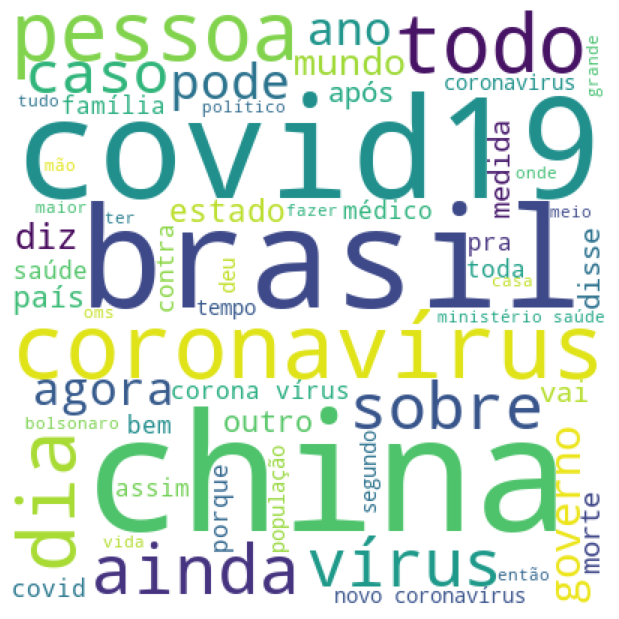

In [34]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = palavras_parada, 
            min_font_size = 10).generate(all_tokens) 
                      
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

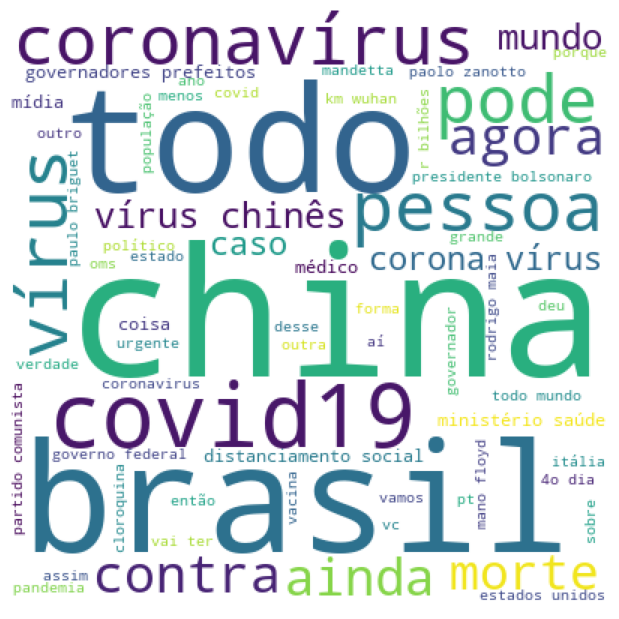

In [31]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = palavras_parada, 
            min_font_size = 10).generate(fake_tokens) 
                      
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

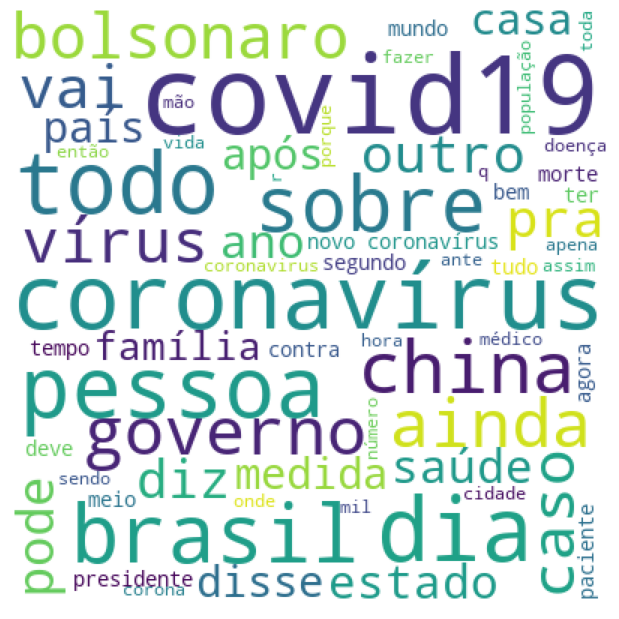

In [35]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = palavras_parada, 
            min_font_size = 10).generate(real_tokens) 
                      
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [46]:
stoplist = set(stopwords.words("portuguese"))
stoplist.add("r")
all_tokens_words = [w for w in all_tokens.split() if w not in stoplist]
fake_tokens_words = [w for w in fake_tokens.split() if w not in stoplist]
real_tokens_words = [w for w in real_tokens.split() if w not in stoplist]

In [ ]:
fake_tokens_words    

In [42]:
Counter(all_tokens_words).most_common(20)

[('coronavírus', 1056),
 ('brasil', 990),
 ('covid19', 861),
 ('china', 800),
 ('bolsonaro', 776),
 ('pessoas', 738),
 ('vírus', 732),
 ('saúde', 674),
 ('vai', 617),
 ('governo', 606),
 ('presidente', 554),
 ('todos', 552),
 ('dia', 536),
 ('pra', 528),
 ('sobre', 525),
 ('país', 492),
 ('agora', 479),
 ('mundo', 470),
 ('contra', 465),
 ('tudo', 449)]

In [43]:
Counter(fake_tokens_words).most_common(20)

[('brasil', 633),
 ('china', 545),
 ('bolsonaro', 524),
 ('vírus', 473),
 ('pra', 371),
 ('presidente', 363),
 ('todos', 361),
 ('vai', 352),
 ('pessoas', 333),
 ('agora', 323),
 ('país', 323),
 ('governo', 318),
 ('povo', 314),
 ('tudo', 308),
 ('mundo', 291),
 ('saúde', 281),
 ('coronavírus', 265),
 ('porque', 262),
 ('covid19', 261),
 ('dia', 235)]

In [47]:
Counter(real_tokens_words).most_common(20)

[('coronavírus', 791),
 ('covid19', 600),
 ('pessoas', 405),
 ('saúde', 393),
 ('brasil', 357),
 ('sobre', 335),
 ('dia', 301),
 ('contra', 293),
 ('governo', 288),
 ('pandemia', 276),
 ('vai', 265),
 ('vírus', 259),
 ('casos', 258),
 ('china', 255),
 ('bolsonaro', 252),
 ('novo', 206),
 ('corona', 205),
 ('mil', 198),
 ('casa', 196),
 ('ainda', 195)]